# Data exploration

Ref notebooks on Kaggle
https://www.kaggle.com/code/mahyararani/chatgpt-tweets-analysis

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/workspaces/data/chatgpt1.csv/chatgpt1.csv'
df = pd.read_csv(file_path)

df.head(5)

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2023-01-22 13:44:34+00:00,1617156270871699456,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...,mochico0123,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/mochico0123,NaN,NaN,1,0,5,0,1617156270871699456,ja,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0
1,2023-01-22 13:44:39+00:00,1617156291046133761,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,NaN,NaN,1,0,5,0,1617148639993806848,en,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,"[User(username='AlexandrovnaIng', id=282705900...",[],0
2,2023-01-22 13:44:44+00:00,1617156308926349312,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,4,0,1617156308926349312,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1
3,2023-01-22 13:44:49+00:00,1617156332297256961,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155...,['https://t.co/ENTSzi2AQ9'],0,0,2,0,1617156332297256961,en,"<a href=""http://twitter.com/download/android"" ...",NaN,https://twitter.com/agadmator/status/161715501...,NaN,[],0
4,2023-01-22 13:44:52+00:00,1617156345064570880,"Profilinde vatan, Türkiye falan yazan bireyler...",0xGenetikciniz,https://twitter.com/0xGenetikciniz/status/1617...,https://twitter.com/0xGenetikciniz,NaN,NaN,0,0,4,0,1617156345064570880,tr,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0


# Initial Look at the dataset

In [24]:
# Statistical Distribution of the the Numerical variables in the tweets dataset
print(df.shape)
df.describe()

(50001, 20)


,Tweet Id,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,hastag_counts
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,5.000100e+04,50001.000000
mean,1.617493e+18,0.929141,1.498510,9.696326,0.219536,1.617205e+18,0.783304
std,1.725682e+14,23.251710,46.030058,313.524215,10.356329,1.005075e+16,1.975040
min,1.617156e+18,0.000000,0.000000,0.000000,0.000000,6.493609e+17,0.000000
25%,1.617354e+18,0.000000,0.000000,0.000000,0.000000,1.617302e+18,0.000000
50%,1.617525e+18,0.000000,0.000000,0.000000,0.000000,1.617504e+18,0.000000
75%,1.617625e+18,1.000000,0.000000,2.000000,0.000000,1.617607e+18,1.000000
max,1.617779e+18,3098.000000,6815.000000,56073.000000,1947.000000,1.617779e+18,28.000000


In [25]:
df.dtypes

Datetime          object
Tweet Id           int64
Text              object
Username          object
Permalink         object
User              object
Outlinks          object
CountLinks        object
ReplyCount         int64
RetweetCount       int64
LikeCount          int64
QuoteCount         int64
ConversationId     int64
Language          object
Source            object
Media             object
QuotedTweet       object
MentionedUsers    object
hashtag           object
hastag_counts      int64
dtype: object

In [26]:
# A summary of the overall dataset
def summary(df):
    summary = pd.DataFrame(df.dtypes, columns = ['dtypes'])
    summary = summary.reset_index()
    summary['missing'] = df.isnull().sum().values
    summary['Uniques'] = df.nunique().values
    return summary

summary(df)

,index,dtypes,missing,Uniques
0,Datetime,object,0,41559
1,Tweet Id,int64,0,50001
2,Text,object,0,49555
3,Username,object,0,38433
4,Permalink,object,0,50001
5,User,object,0,38433
6,Outlinks,object,30059,13769
7,CountLinks,object,30059,19485
8,ReplyCount,int64,0,108
9,RetweetCount,int64,0,138


# Exploratory Data Analysis (EDA)

## Number of Tweets per Datetime

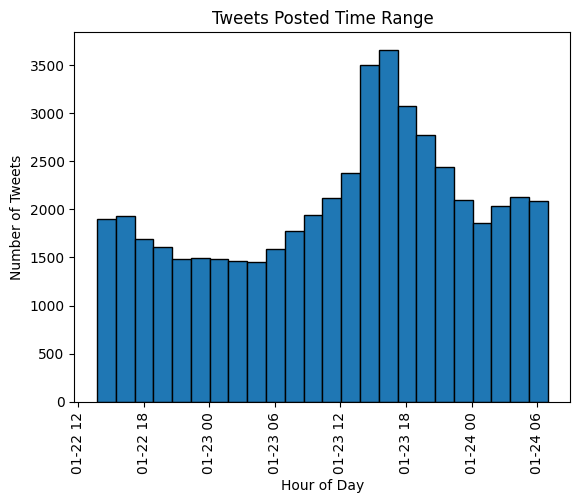

In [27]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

plt.hist(df['Datetime'], bins=24, edgecolor='black')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Tweets')
plt.title('Tweets Posted Time Range')
plt.xticks(rotation=90)

plt.show()

## Interactions with Tweets

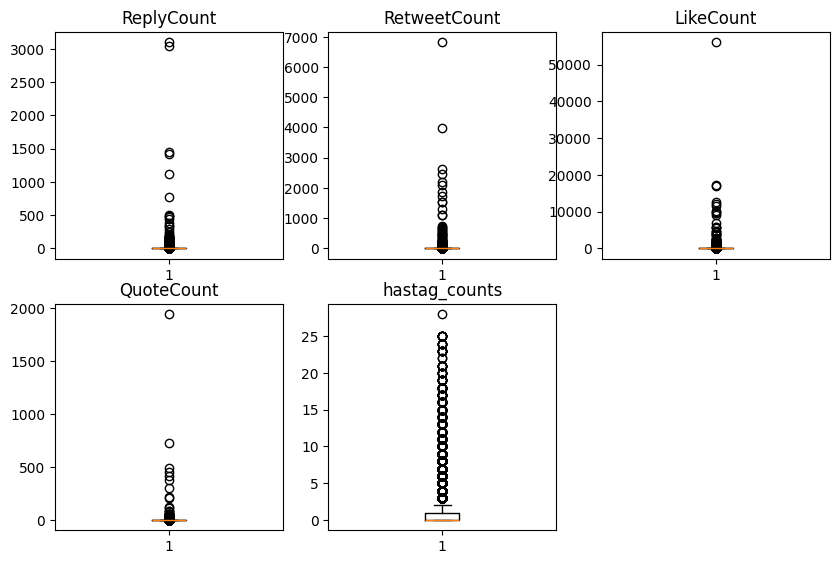

In [28]:
# Boxplots
fig = plt.figure(figsize = (10, 10))
features = ['ReplyCount',
            'RetweetCount',
            'LikeCount',
            'QuoteCount',
            'hastag_counts']
for i in range(len(features)):
    plt.subplot(3,3, i+1)
    plt.boxplot(df[features[i]])
    plt.title(features[i])

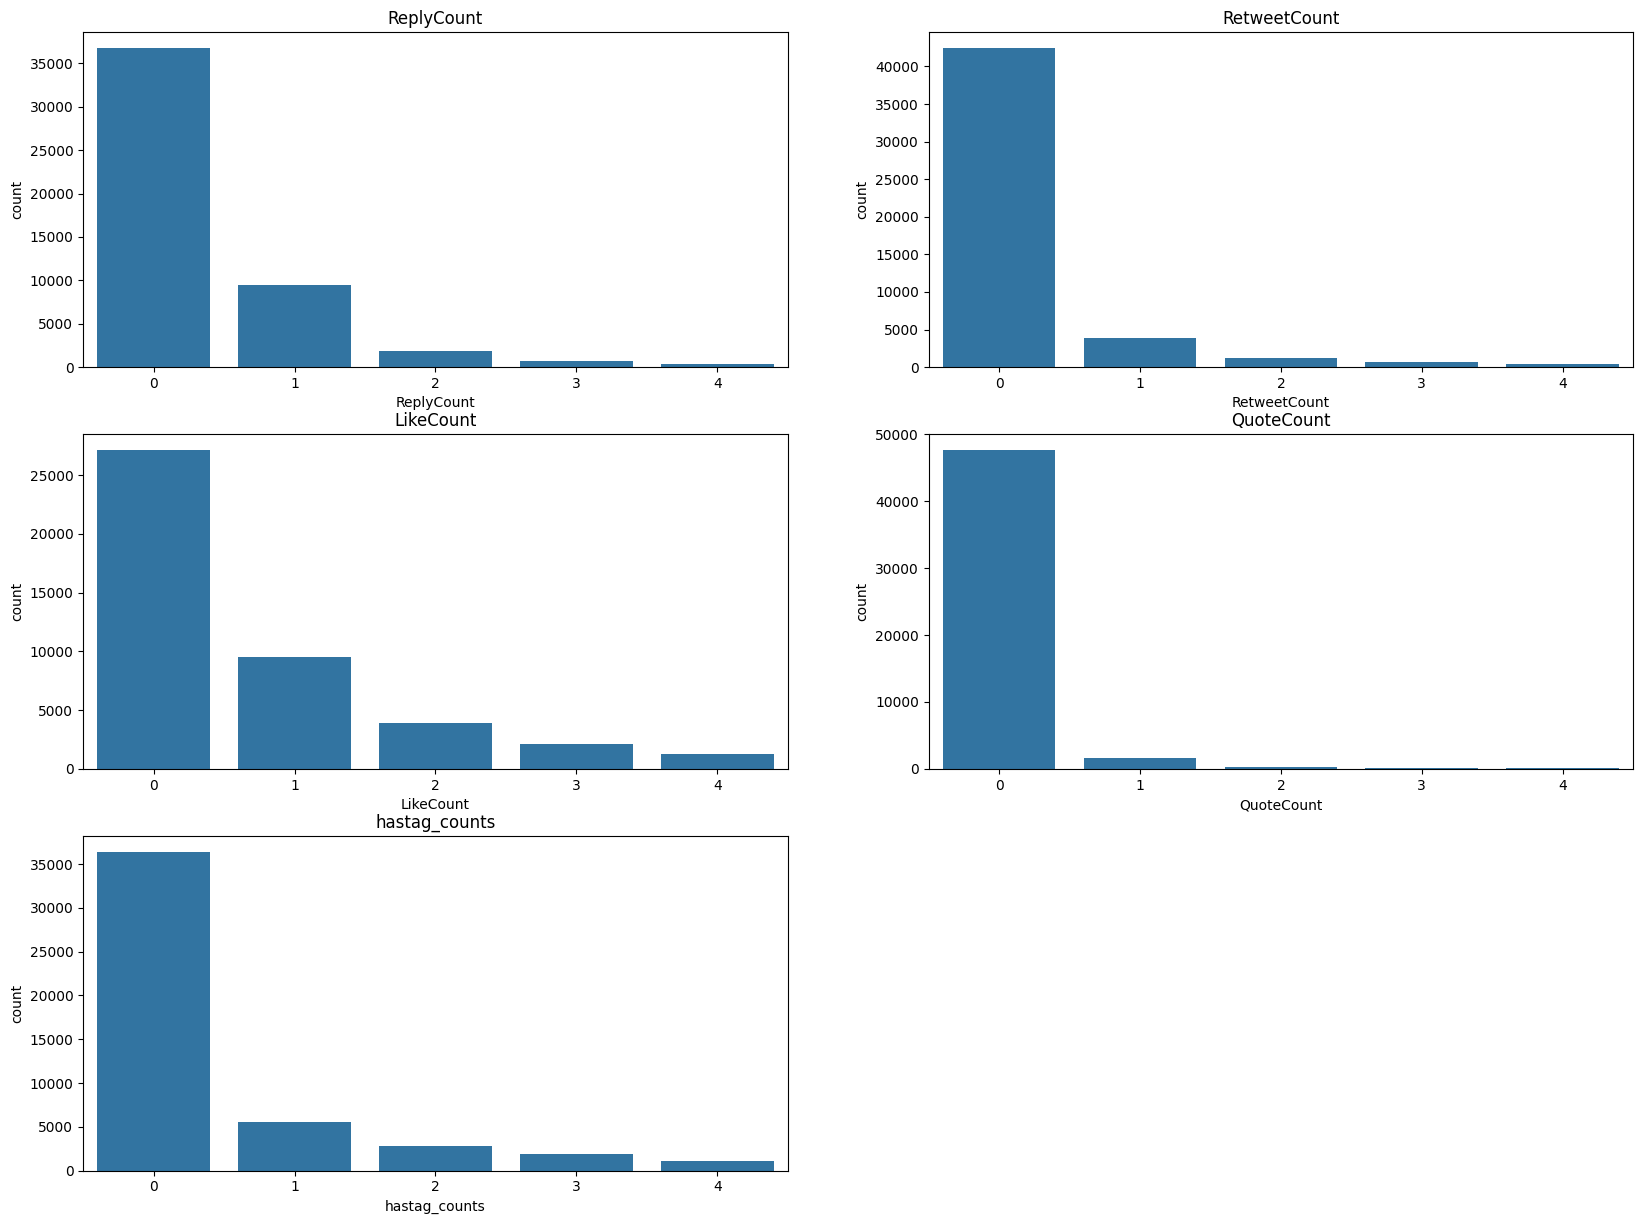

In [34]:
#CountPlot or Barcharts
import seaborn as sns

fig = plt.figure(figsize = (20, 20))
for i in range(len(features)):
    plt.subplot(4,2, i+1)
    sns.countplot(data=df, x=features[i], order=df[features[i]].value_counts().index[:5])
    plt.title(features[i])

## Most mentioned users

In [47]:
df['MentionedUsers'].head(5)

0                NaN
1    AlexandrovnaIng
2             fobizz
3                NaN
4                NaN
Name: MentionedUsers, dtype: object

### Cleaning up user names

In [44]:
import numpy as np

In [45]:
for i in range(len(df['MentionedUsers'])):
    if isinstance(df['MentionedUsers'][i], str):
        username = df['MentionedUsers'][i].split("username='")[1].split("',")[0]
        df.loc[i, 'MentionedUsers'] = username
    else:
        df.loc[i, 'MentionedUsers'] = np.nan

### Plot most frequently mentioned users

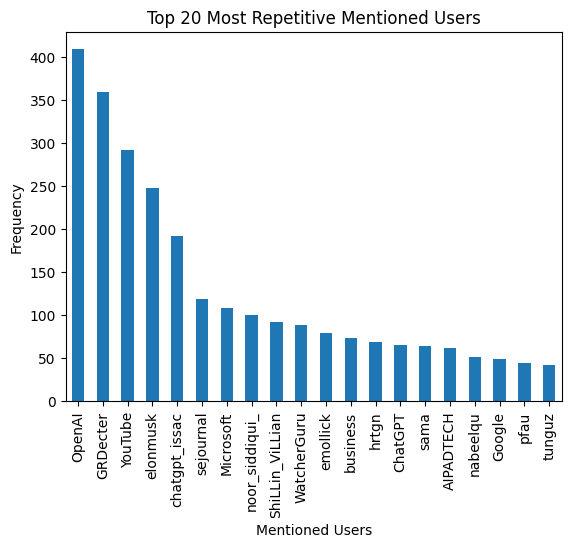

In [46]:
counts = df['MentionedUsers'].value_counts()
top = counts.nlargest(20)

top.plot(kind='bar')

plt.title('Top 20 Most Repetitive Mentioned Users')
plt.xlabel('Mentioned Users')
plt.ylabel('Frequency')

plt.show()

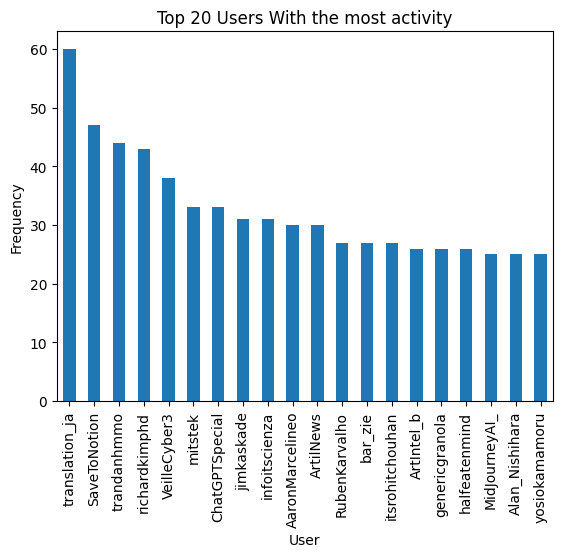

In [48]:
counts = df['Username'].value_counts()
top = counts.nlargest(20)

top.plot(kind='bar')

plt.title('Top 20 Users With the most activity')
plt.xlabel('User')
plt.ylabel('Frequency')

plt.show()

## Looking at Hashtags

In [54]:
df['hashtag'].head(20)

0                                                    []
1                                                    []
2                                          ['#ChatGPT']
3                                                    []
4                                                    []
5                                                    []
6                                                    []
7                                                    []
8                           ['#ChatGPT', '#midjourney']
9                                          ['#ChatGPT']
10                                                   []
11    ['#ChatGPT', '#visionary', '#ArtificialIntelli...
12                                                   []
13                                                   []
14                                         ['#ChatGPT']
15    ['#ChatGPT', '#MicrosoftEDU', '#MIEExpert', '#...
16                                                   []
17                                              

### Hashtag transformation

In [56]:
import re
df['hashtags'] = df['hashtag'].apply(lambda x: re.sub(r'[\[\]#\'"]', '', x.lower()))

In [62]:
stack1 = df['hashtags'].str.split(',', expand=True).stack()
stack1.head(20)

0   0                           
1   0                           
2   0                    chatgpt
3   0                           
4   0                           
5   0                           
6   0                           
7   0                           
8   0                    chatgpt
    1                 midjourney
9   0                    chatgpt
10  0                           
11  0                    chatgpt
    1                  visionary
    2     artificialintelligence
    3                     future
12  0                           
13  0                           
14  0                    chatgpt
15  0                    chatgpt
dtype: object

In [65]:
stack1[11][1]

' visionary'

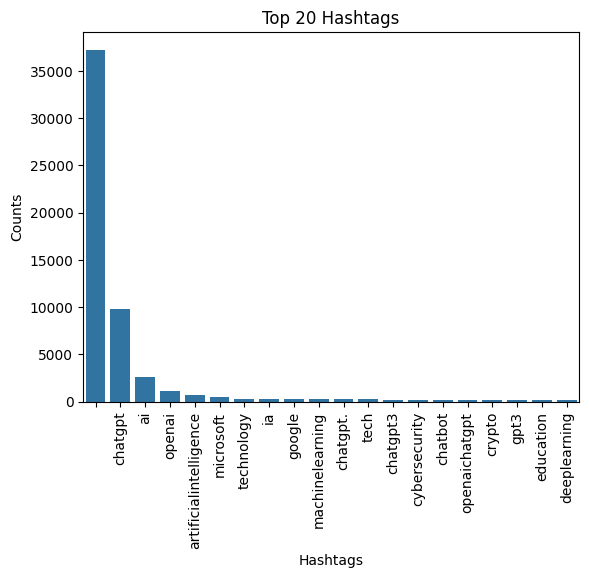

In [66]:

hashtags = df['hashtags'].str.split(',', expand=True).stack().str.strip().value_counts()

top_hashtags = hashtags.head(20)

sns.barplot(x=top_hashtags.index, y=top_hashtags.values)
plt.title('Top 20 Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

## What are the posts that had the most reactions?

### Understanding reaction to other tweets


We generate a variable consist of aggregation of ReplyCount, RetweetCount,LikeCount, QuoteCount to better understand the reactions to the hashtags or other texts.

Text(0.5, 1.0, 'Reaction Counts')

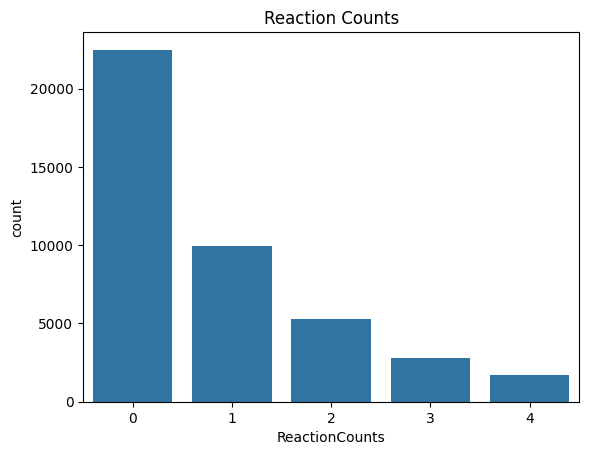

In [67]:
# Feature Engineering
df['ReactionCounts'] = df['ReplyCount'] + df['RetweetCount'] + df['LikeCount'] + df['QuoteCount']

# Plot top 5 amount of reactions per post
sns.countplot(data=df, x='ReactionCounts', order=df['ReactionCounts'].value_counts().index[:5])
plt.title('Reaction Counts')

Here we should mention out of 50K of total posts, almost half of them did not even received any reactions from (ReplyCount, RetweetCount,LikeCount, QuoteCount) from other users.

In [77]:
df_sorted_by_reactions = df.sort_values(by='ReactionCounts', ascending=False).reset_index(drop=True)

In [78]:
pd.set_option('display.max_colwidth', None)
df_sorted_by_reactions['Text'].head()

0                                                                                                                                                                                                                           ChatGPT passed a Wharton MBA exam. \n\nTime to overhaul education.
1                                                                                                                                                          子どもの練習用に基礎単語1000単語くらい網羅した瞬間英作文教材ほしいけど自作するの大変そうだなーどうしようかなーって考えてたけど、ChatGPTさんが一瞬で作ってくれることに気付いた。ほんと凄いねこのAI...。 https://t.co/ZEaf3WH5eQ
2                                                                           The fact that ChatGPT writes strange and mediocre undergraduate humanities papers but fantastic elite MBA exams suggests it may not have the same implications for every kind of education https://t.co/6MiaepzCDU
3    Pretty absurd that chatGPT has passed the United States Medical Licensing Examination (USMLE). \n\nToday, it takes 4 years of med scho

## Language distribution

Text(0.5, 1.0, 'Languages in the Posts')

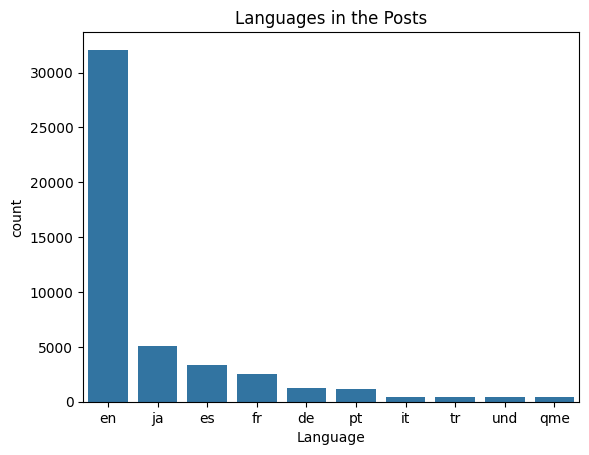

In [79]:
sns.countplot(data=df, x='Language', order=df['Language'].value_counts().index[:10])
plt.title('Languages in the Posts')

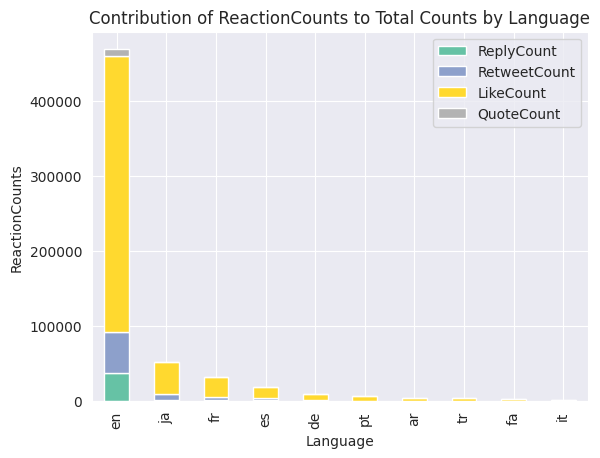

In [80]:
sns.set_style("darkgrid")
df_top10 = df.groupby('Language').sum().sort_values('ReactionCounts', ascending=False).head(10)
ax = df_top10[['ReplyCount',
               'RetweetCount',
               'LikeCount',
               'QuoteCount']].plot(kind='bar', stacked=True, colormap='Set2')
    
plt.title('Contribution of ReactionCounts to Total Counts by Language')
plt.xlabel('Language')
plt.ylabel('ReactionCounts')
plt.show()

In [18]:
# Convert 'Datetime' column to datetime object
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')

# Drop rows with invalid datetime entries
df = df.dropna(subset=['Datetime'])

# Check for duplicates and remove them
df = df.drop_duplicates(subset=['Tweet Id'])


In [5]:
# Summary of missing values
missing_values = df.isnull().sum()

# Analyze language distribution
language_distribution = df['Language'].value_counts()

# Analyze tweet activity over time
tweets_per_day = df['Datetime'].dt.date.value_counts().sort_index()

# Output summary information
missing_values, language_distribution.head(), tweets_per_day.head()


(Datetime              0
 Tweet Id              0
 Text                  0
 Username              0
 Permalink             0
 User                  0
 Outlinks          30059
 CountLinks        30059
 ReplyCount            0
 RetweetCount          0
 LikeCount             0
 QuoteCount            0
 ConversationId        0
 Language              0
 Source                0
 Media             40499
 QuotedTweet       46438
 MentionedUsers    32832
 hashtag               0
 hastag_counts         0
 dtype: int64,
 Language
 en    32076
 ja     5046
 es     3315
 fr     2492
 de     1207
 Name: count, dtype: int64,
 Datetime
 2023-01-22    10068
 2023-01-23    31700
 2023-01-24     8233
 Name: count, dtype: int64)

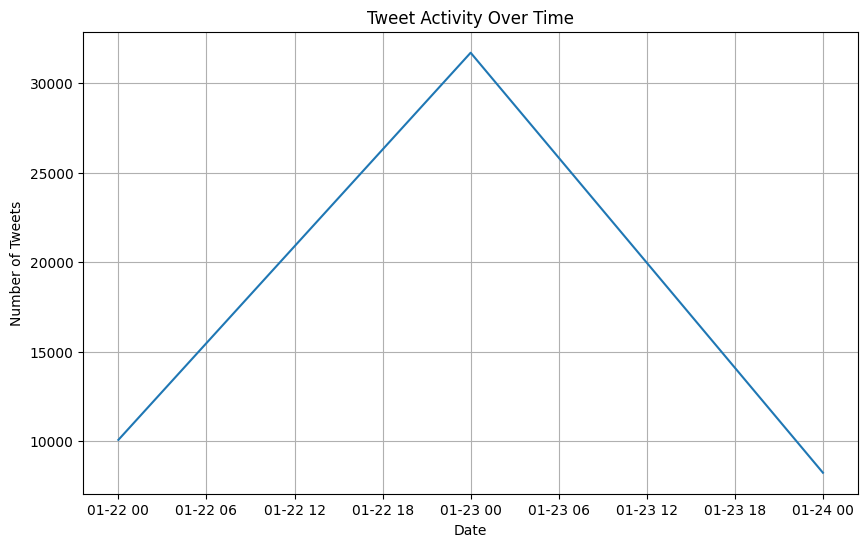

In [8]:

# Plot tweet activity over time
plt.figure(figsize=(10, 6))
tweets_per_day.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Tweet Activity Over Time')
plt.grid(True)
plt.show()